In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123456)

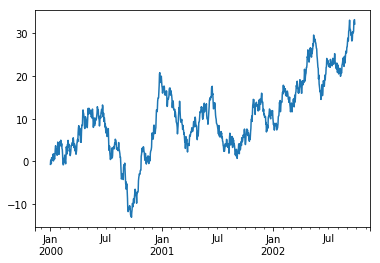

In [11]:
import pandas as pd
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

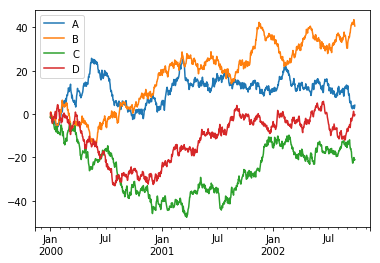

In [12]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()

plt.figure()

df.plot()

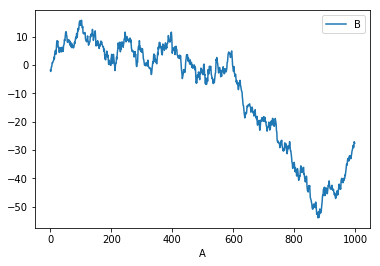

In [15]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

df3['A'] = pd.Series(list(range(len(df))))

df3.plot(x='A', y='B')

### Other Plots
- 'bar' or 'barh' for bar plots
- 'hist' for histogram
- 'box' for boxplot
- 'kde' or 'density' for density plots
- 'area' for area plots
- 'scatter' for scatter plots
- 'hexbin' for hexagonal bin plots
- 'pie' for pie plots

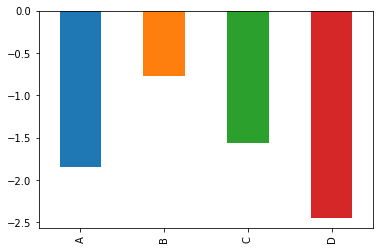

In [18]:
plt.figure()

df.iloc[5].plot(kind = 'bar')

For labeled, non-time series data, you may wish to produce a bar plot

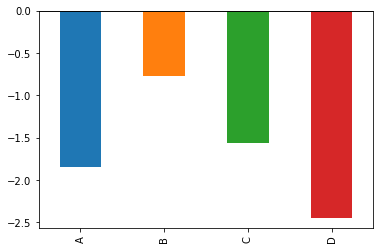

In [21]:
plt.figure()

df.iloc[5].plot.bar(); plt.axhline(0, color='k')

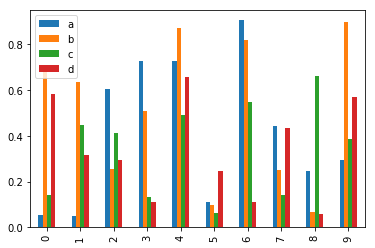

In [22]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar()

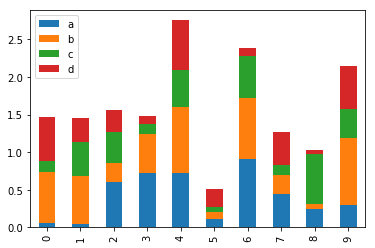

In [23]:
df2.plot.bar(stacked=True)

To get horizontal bar plots, use the barh method

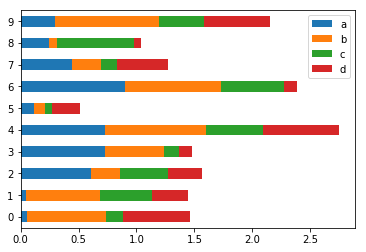

In [24]:
df2.plot.barh(stacked=True)

Histograms can be drawn by using the DataFrame.plot.hist() and Series.plot.hist() methods

A histogram can be stacked using `stacked=True`. Bin size can be changed using the bins keyword

<Figure size 432x288 with 0 Axes>

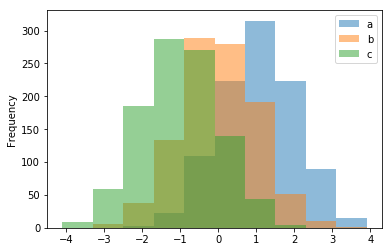

In [25]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

plt.figure()

df4.plot.hist(alpha=0.5)

<Figure size 432x288 with 0 Axes>

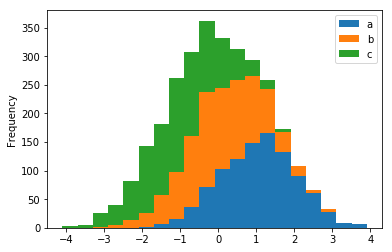

In [26]:
plt.figure()

df4.plot.hist(stacked=True, bins=20)

The existing interface `DataFrame.hist` to plot histogram still can be used

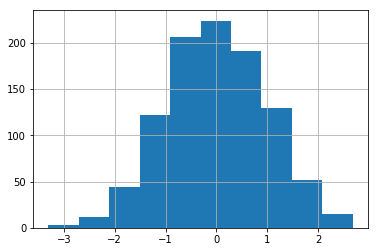

In [27]:
plt.figure()

df['A'].diff().hist()

**DataFrame.hist()** plots the histograms of the columns on multiple subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a765e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a9b5b38>]], dtype=object)

<Figure size 432x288 with 0 Axes>

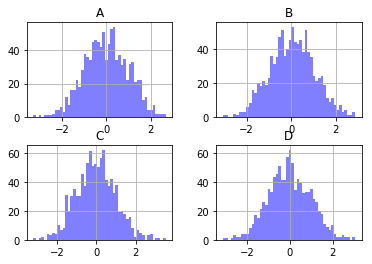

In [39]:
plt.figure()

df.diff().hist(color='b', alpha=0.5, bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a179c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a369ef0>]], dtype=object)

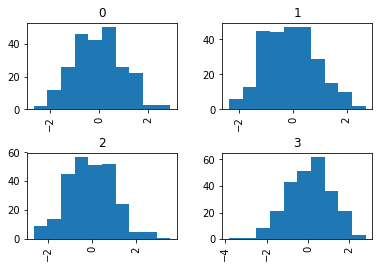

In [37]:
data = pd.Series(np.random.randn(1000))

data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

### Box Plots
Boxplot can be drawn calling **Series.plot.box()** and **DataFrame.plot.box()**, or **DataFrame.boxplot()** to visualize the distribution of values within each column

Boxplot can be colorized by passing `color` keyword. You can pass a `dict` whose keys are `boxes`, `whiskers`, `medians` and `caps`. If some keys are missing in the `dict`， default colors are used for the corresponding artists. Also, boxplot has `sym` keyword to specify fliers style.

The existing interface `DataFrame.boxplot` to plot boxplot still can be used

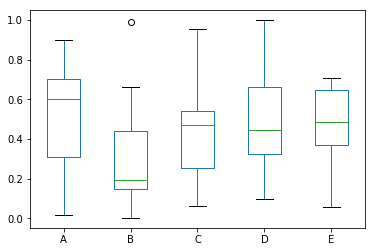

In [41]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot.box()

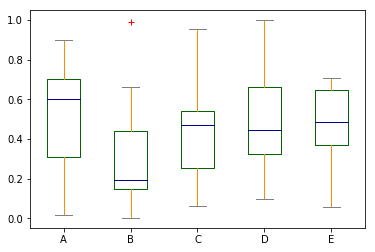

In [42]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')

df.plot.box(color=color, sym='r+')

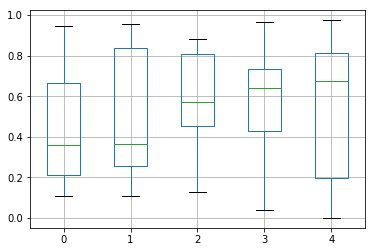

In [45]:
df = pd.DataFrame(np.random.rand(10,5))

plt.figure()

bp = df.boxplot()

<Figure size 432x288 with 0 Axes>

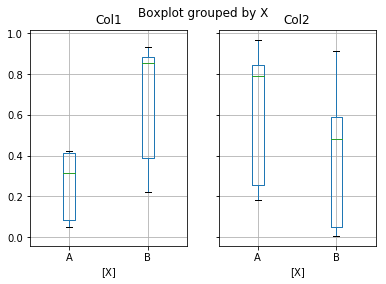

In [47]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

plt.figure();

bp = df.boxplot(by='X')

You can also pass a subset of columns to plot, as well as group by multiple columns

<Figure size 432x288 with 0 Axes>

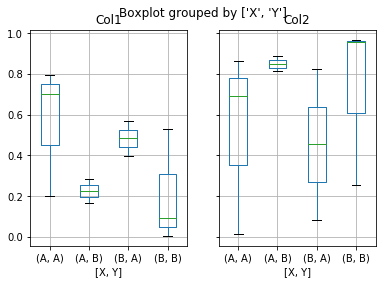

In [48]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])

plt.figure();

bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])

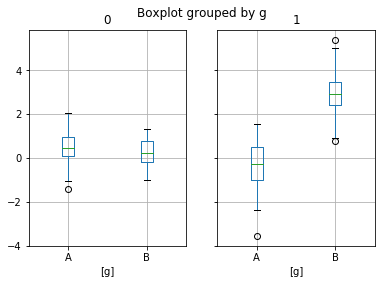

In [52]:
np.random.seed(1234)

df_box = pd.DataFrame(np.random.randn(50, 2))

df_box['g'] = np.random.choice(['A', 'B'], size=50)

df_box.loc[df_box['g'] == 'B', 1] += 3

bp = df_box.boxplot(by='g')

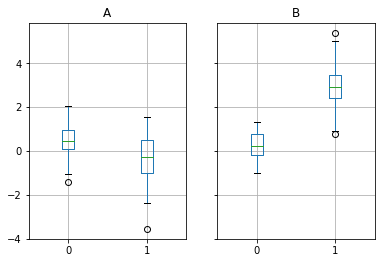

In [58]:
bp = df_box.groupby('g').boxplot()

### Area Plot
You can create area plots with **Series.plot.area()** and **DataFrame.plot.area()**. Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use **dataframe.dropna()** or **dataframe.fillna()** before calling plot.

To produce an unstacked plot, pass `stacked=False`. Alpha value is set to 0.5 unless otherwise specified:

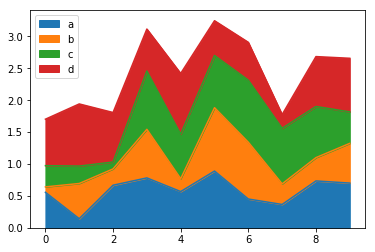

In [59]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot.area()

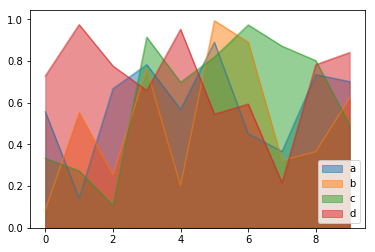

In [60]:
df.plot.area(stacked=False)

### Scatter Plot
Scatter plot can be drawn by using the **DataFrame.plot.scatter()** method. Scatter plot requires numeric columns for the x and y axes. These can be specified by the x and y keywords.

To plot multiple column groups in a single axes, repeat plot method specifying target ax. It is recommended to specify `color` and `label` keywords to distinguish each groups.

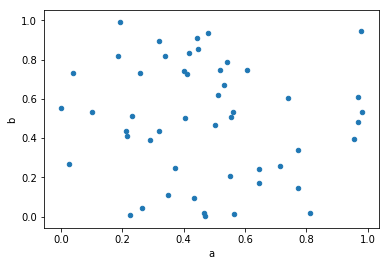

In [71]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

df.plot.scatter(x='a', y='b')

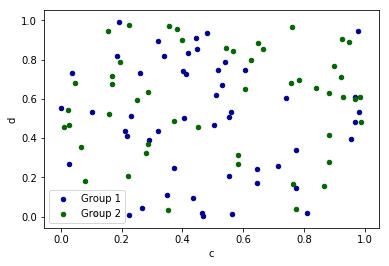

In [72]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')

df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

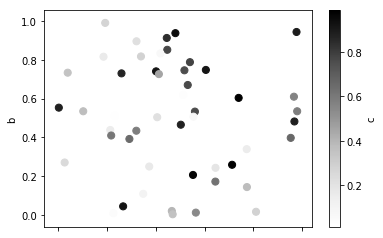

In [73]:
df.plot.scatter(x='a', y='b', c='c', s=50)

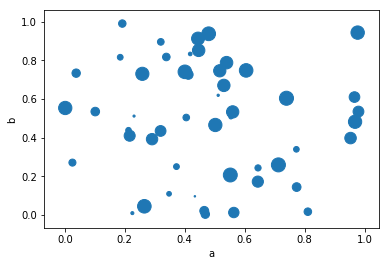

In [74]:
df.plot.scatter(x='a', y='b', s=df['c']*200)

### Hexagonal Bin Plot
You can create hexagonal bin plots with **DataFrame.plot.hexbin()**. Hexbin plots casn be a useful alternative to scatter plots if your data are dense to plot each point individually.

By default, a histogram of the counts around each `(x,y)` point is computed. You can specify alternative aggregations by passing values to the `c` and `reduce_C_function` arguments. `c` specifies the value at each `(x, y)` point and `reduce_C_function` is a function of one argument that reduces all the values in a bin to a single number (e.g. `mean`, `max`, `sum`, `std`)

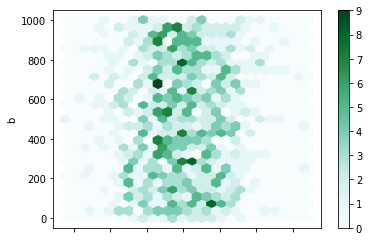

In [75]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df['b'] = df['b'] + np.arange(1000)

df.plot.hexbin(x='a', y='b', gridsize=25)

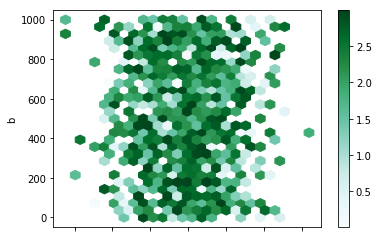

In [76]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df['b'] = df['b'] = df['b'] + np.arange(1000)

df['z'] = np.random.uniform(0, 3, 1000)

df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,
               gridsize=25)

### Pie Plot
You can create a pie plot with **DataFrame.plot.pie()** or **Series.plot.pie()**. If your data includes any `NaN`, they will be automatically filled with 0. A `ValueError` will be raised if there are any negative values in your data.

Note that pie plot with **DataFrame** requires that you either specify a target column by the `y` argument or `subplots=True`. When `y` is specified, pie plot of selected column will be drawn. If `subplots=True` is specified, pie plots for each column are drawn as subplots. A legend will be drawn in each pie by default; specify `legend=False` to hide it.

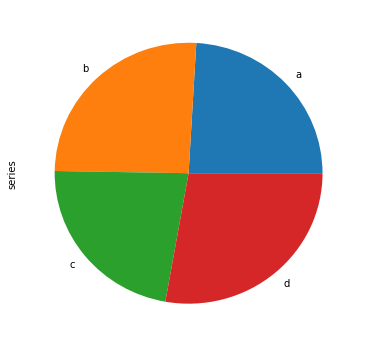

In [79]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')

series.plot.pie(figsize = (6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11cc32550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ce35160>], dtype=object)

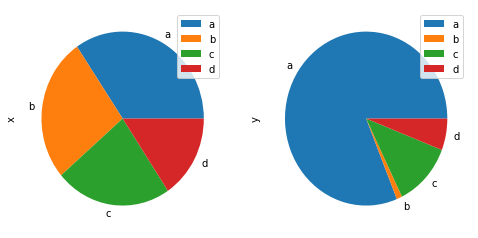

In [80]:
df = pd.DataFrame(3* np.random.rand(4,2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

df.plot.pie(subplots=True, figsize=(8, 4))

You can use the `labels` and `colors` keywords to specify the labels and colors of each wedge

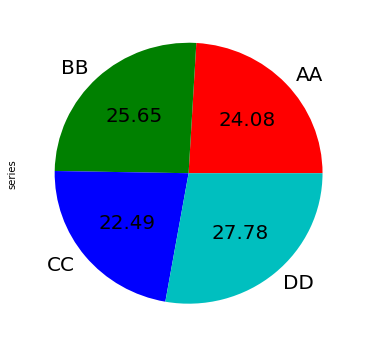

In [81]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                autopct='%.2f', fontsize=20, figsize=(6, 6))